In [19]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import mibian
import math
%matplotlib inline

## Load Vix Historical File
This file was loaded from [here](https://finance.yahoo.com/quote/%5EVIX/history/)

In [3]:
# Data File Location
vix_data = os.getenv('HOME') + '/Documents/platypus/vix/vix_20200509.csv'
# Load File into Dataframe
vix_df = pd.read_csv(vix_data)
# Convert Date Field to Datetime Object
vix_df['Date'] = pd.to_datetime(vix_df['Date'])
# Set Index to Date Field
vix_df.set_index(['Date'], inplace=True)

## Load Citi Historical File
This file was sources from [here](https://finance.yahoo.com/quote/C/history?period1=1575849600&period2=1588982400&interval=1d&filter=history&frequency=1d)

In [33]:
# Data File Location
citi_data = os.getenv('HOME') + '/Documents/platypus/citi/citi_20200509.csv'
# Load File into Dataframe
citi_df = pd.read_csv(citi_data)
# Convert Date Field to Datetime Object
citi_df['Date'] = pd.to_datetime(citi_df['Date'])
# Set Index to Date Field
citi_df.set_index(['Date'], inplace=True)

## Visualization of VIX and Citi

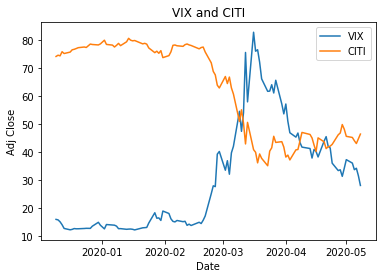

In [15]:
plt.plot(vix_df['Adj Close'], label="VIX")
plt.plot(citi_df['Adj Close'], label="CITI")
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('VIX and CITI')
plt.legend()
plt.show()

## Calculate Historical Volatility

In [24]:
def return_on_price(current_price, previous_price):
    return math.log(current_price, previous_price)

In [38]:
citi_df['Adj Close Shift'] = citi_df['Adj Close'].shift(1)
citi_df['Adj Close Price Return'] = citi_df.apply(lambda row : return_on_price(row['Adj Close'], row['Adj Close Shift']), axis = 1)
citi_df['Rolling Variance'] = citi_df['Adj Close Price Return'].rolling(30).var()
citi_df.tail(30)

,Open,High,Low,Close,Adj Close,Volume,Adj Close Shift,Adj Close Price Return,Rolling Std,Rolling Variance
Date,,,,,,,,,,
2020-03-27,44.130001,45.500000,43.000000,43.799999,43.339993,25484500,45.536678,0.987052,0.022085,0.000488
2020-03-30,44.049999,44.259998,41.570000,44.080002,43.617054,27459000,43.339993,1.001691,0.022103,0.000489
2020-03-31,43.630001,44.230000,41.650002,42.119999,41.677635,26219100,43.617054,0.987953,0.022145,0.000490
2020-04-01,39.139999,40.250000,38.000000,38.509998,38.105549,29219500,41.677635,0.975977,0.022384,0.000501
2020-04-02,38.360001,39.660000,37.299999,39.230000,38.817989,29532100,38.105549,1.005088,0.022443,0.000504
2020-04-03,39.000000,39.459999,36.669998,37.490002,37.096264,25327100,38.817989,0.987601,0.022479,0.000505
2020-04-06,39.799999,41.340000,39.509998,41.119999,40.688137,30064700,37.096264,1.025576,0.023153,0.000536
2020-04-07,44.810001,45.590000,41.119999,41.250000,40.816772,35220700,40.688137,1.000852,0.023146,0.000536
2020-04-08,42.849998,44.450001,41.970001,44.259998,43.795158,32944800,40.816772,1.018989,0.023527,0.000554
